# From Travel to Finance: How Airbnb Leverages Guest Payments


> What is Interest Income? Interest income is the amount paid to an entity for lending its money or letting another entity use its funds. On a larger scale, interest income is the amount earned by an investor's money that he places in an investment or project.

- Data sources 

https://airbnb2020ipo.q4web.com/files/doc_financials/2024/q1/Airbnb_Q1-2024-Shareholder-Letter_Final-1.pdf

In [96]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

In [20]:
ticker = yf.Ticker("ABNB")

In [21]:
# get historical market data
hist = ticker.history(period="max")
dt_financials_0 = ticker.financials
key = "Interest Income Non Operating"




In [22]:
dt_financials_0.loc[key]

2023-12-31    721000000.0
2022-12-31    186000000.0
2021-12-31     13000000.0
2020-12-31     27117000.0
Name: Interest Income Non Operating, dtype: object

In [3]:
# ticker.info

data_history = ticker.history(period="max")

In [41]:
dt_financials = yf.Ticker('ABNB').get_income_stmt(freq='yearly')

In [73]:
key = 'InterestIncomeNonOperating'
result = dt_financials.loc[key]
result.loc[pd.Timestamp('2024-04-30')] = 777_000_000
result = pd.DataFrame(result).reset_index()
result = result.sort_values(by='index')

,InterestIncomeNonOperating
2023-12-31,721000000.0
2022-12-31,186000000.0
2021-12-31,13000000.0
2020-12-31,27117000.0
2024-04-30,777000000


- Total Expenses (Cash) metric represents the sum of all costs and expenditures incurred by a business over a specific period, calculated based on actual cash payments made.
- Revenue: This is the classic comparison. By looking at interest income as a percentage of total revenue, you can see how significant it is relative to Airbnb's core business of booking travel. For example, if Airbnb's total revenue is $10 billion and interest income is $777 million, then interest income represents 7.77% of total revenue.

In [124]:
tmp = yf.Ticker('ABNB').get_balancesheet(freq='yearly')


In [131]:
tmp = yf.Ticker('ABNB').get_financials(freq='yearly')

In [129]:
tmp.loc['TotalDebt']
4,939,000

2023-12-31    2304000000.0
2022-12-31    2341000000.0
2021-12-31    2418000000.0
2020-12-31    2329808000.0
2019-12-31             NaN
Name: TotalDebt, dtype: object

In [143]:

key = 'TotalRevenue'

# key = 'NetIncome'
def get_key(data,key):
    '''
    '''
    return   data.loc[key]


def add_entry(result:pd.DataFrame,new_entry):
    '''
    '''
    result = dt_financials.loc[key]
    result.loc[new_entry[0]] = new_entry[1]
    result = pd.DataFrame(result).reset_index()
    result = result.sort_values(by='index')

    return result 

In [136]:
tmp = yf.Ticker('ABNB').get_financials(freq='yearly')

In [162]:
key = 'TotalRevenue'
res = get_key(tmp,key)
data_tot_revenue = add_entry(res,new_entry=(pd.Timestamp('2024-04-30'),10_241_000_000.0))
display(data_tot_revenue )

,index,TotalRevenue
3,2020-12-31,3378199000.0
2,2021-12-31,5992000000.0
1,2022-12-31,8399000000.0
0,2023-12-31,9917000000.0
4,2024-04-30,10241000000.0


In [167]:
key = 'InterestIncomeNonOperating'
result = dt_financials.loc[key]
# result.loc[pd.Timestamp('2024-04-30')] = 777_000_000
# result = pd.DataFrame(result).reset_index()

res = get_key(tmp,key)
data_interest_income = add_entry(res,new_entry=(pd.Timestamp('2024-04-30'),777_000_000.0))
display(data_interest_income)

,index,InterestIncomeNonOperating
3,2020-12-31,27117000.0
2,2021-12-31,13000000.0
1,2022-12-31,186000000.0
0,2023-12-31,721000000.0
4,2024-04-30,777000000.0


In [168]:
key = 'NetIncome'
res = get_key(tmp,key)
data_netincome= add_entry(res,new_entry=(pd.Timestamp('2024-04-30'),4_939_000_000.0))
display(data_netincome )

,index,NetIncome
3,2020-12-31,-4584716000.0
2,2021-12-31,-352000000.0
1,2022-12-31,1893000000.0
0,2023-12-31,4792000000.0
4,2024-04-30,4939000000.0


In [169]:
data_ratio = data_interest_income.merge(data_tot_revenue ).merge(data_netincome)
data_ratio['int_per_revenue'] = (data_ratio['InterestIncomeNonOperating']/data_ratio['TotalRevenue']) *100
data_ratio['interestIncome_per_netIncome'] = (data_ratio['InterestIncomeNonOperating']/data_ratio['NetIncome']) *100

data_ratio



,index,InterestIncomeNonOperating,TotalRevenue,NetIncome,int_per_revenue,interestIncome_per_netIncome
0,2020-12-31,27117000.0,3378199000.0,-4584716000.0,0.802706,-0.591465
1,2021-12-31,13000000.0,5992000000.0,-352000000.0,0.216956,-3.693182
2,2022-12-31,186000000.0,8399000000.0,1893000000.0,2.214549,9.825674
3,2023-12-31,721000000.0,9917000000.0,4792000000.0,7.270344,15.04591
4,2024-04-30,777000000.0,10241000000.0,4939000000.0,7.58715,15.73193


Interest income represents 7.5% of total revenue.

/tmp/ipykernel_4782/2650089746.py:18: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



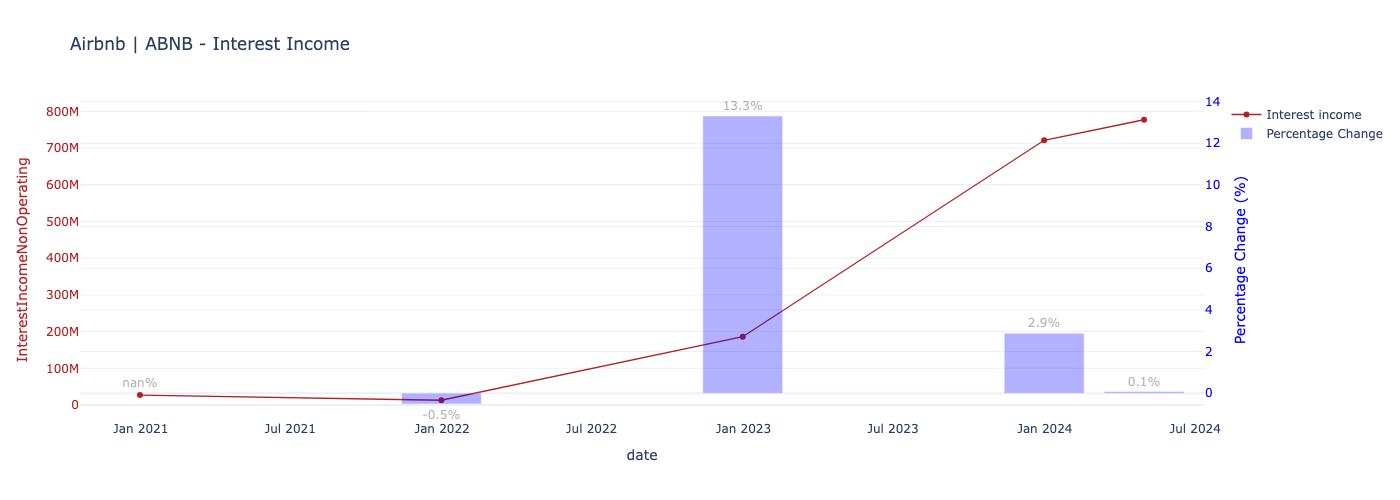

In [172]:
key = 'InterestIncomeNonOperating'
x_val = data_ratio['index']
y_val =data_ratio[key].values

fig = go.Figure(layout=go.Layout(
     
        width=1000,
        height=500,
    ))

fig.add_trace(go.Scatter(x=x_val, y=y_val,
                    mode='lines+markers',
                            text=y_val,
                         line=dict(color='firebrick', width=1.3),
                    name='Interest income' ,yaxis='y1'))


y_val_pct_change = pd.Series(y_val).pct_change()  # converting to percentage
fig.add_trace(go.Bar(x=x_val, 
                         y=y_val_pct_change,
                         # mode='lines+markers',
                     marker_color='blue', 
                     opacity=0.3,
                         name='Percentage Change',                     
                     textposition='outside',  # Position text above the bars

                                              text=[f"{np.round(val, 1)}%" for val in y_val_pct_change],  # Convert to percentage, round and add %,
                                          textfont=dict(color='black'),  # Set text color to green


                         yaxis='y2'))


# Edit the layout
fig.update_layout(title='Airbnb | ABNB - Interest Income',
                  template="plotly_white",
                   xaxis_title='date',
                  yaxis1=dict(
        title=key,
                      titlefont=dict(color='firebrick'),    # Set the title font color to blue
        tickfont=dict(color='firebrick'), 
        side='left'     
    ),
                  yaxis2=dict(
        title='Percentage Change (%)',
                      titlefont=dict(color='blue'),    
        tickfont=dict(color='blue'), 
        overlaying='y',  
        side='right'     
    )
                 
                 
                 )

fig.show()

In [ ]:


# Example Data - Replace with your actual data
dates = ['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31', '2024-04-30']
interest_income = [27117000.0, 13000000.0, 186000000.0, 721000000.0, 777000000.0]
total_revenue = [3378199000.0, 5992000000.0, 8399000000.0, 9917000000.0, 10241000000.0]
net_income = [-458471600.0, -352000000.0, 1893000000.0, 4792000000.0, 4939000000.0]
int_per_revenue = [0.8207, 0.21696, 2.214549, 7.270344, 7.58715]
interest_income_per_net_income = [-0.591465, -3.693182, 9.826574, 15.04591, 15.73193]

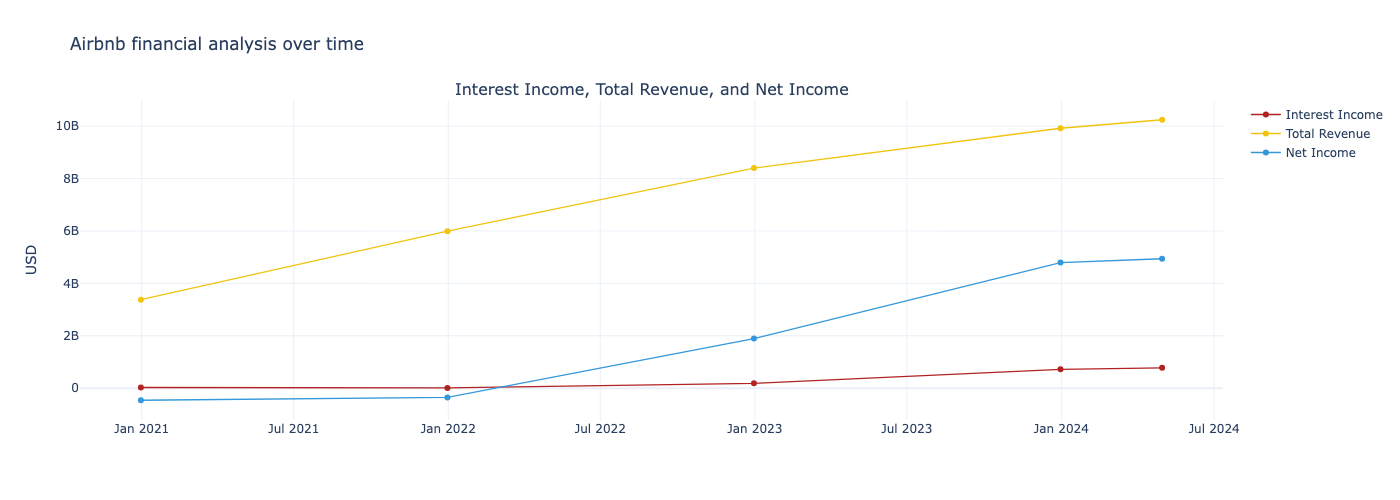

In [184]:
fig = make_subplots(rows=1, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=("Interest Income, Total Revenue, and Net Income",
                                    # "Interest Income to Total Revenue Ratio (%)",
                                    # "Interest Income to Net Income Ratio (%)"
                                   )
                   )

#f1c40f
#9b59b6
fig.add_trace(go.Scatter(x=dates, y=interest_income, mode='lines+markers',     line=dict(color='firebrick', width=1.3), name='Interest Income'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=total_revenue, mode='lines+markers',line=dict(color='#f1c40f', width=1.3), name='Total Revenue'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=net_income, mode='lines+markers', name='Net Income',line=dict(color='#3498db', width=1.3)), row=1, col=1)

fig.update_yaxes(title_text="USD", row=1, col=1)
# Update layout and aesthetics
fig.update_layout(height=500, width=1000, title_text="Airbnb financial analysis over time", template="plotly_white")
fig.show()

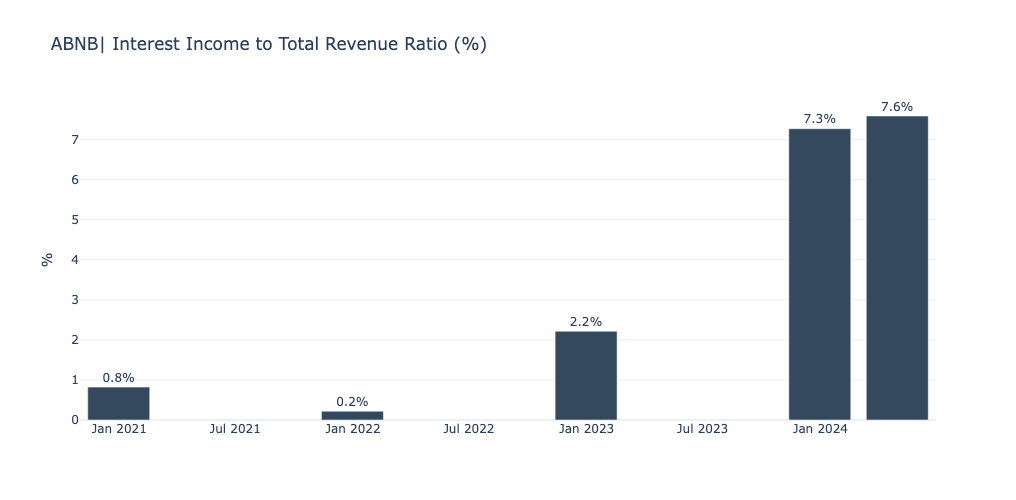

In [193]:
fig = make_subplots(rows=1, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=(
                        # "Interest Income, Total Revenue, and Net Income",
                                    # "Interest Income to Total Revenue Ratio (%)",
                                    # "Interest Income to Net Income Ratio (%)"
                                   )
                   )


fig.add_trace(go.Bar(x=[str(e) for e in dates], 
                     y=int_per_revenue, 
                     name='Interest Income to Total Revenue (%)',
                          textposition='outside',  # Position text above the bars
                     text=[f"{np.round(val, 1)}%" for val in int_per_revenue],  # Convert to percentage, round and add %,
                     marker_color='#34495e'), row=1, col=1)
fig.update_yaxes(title_text="%", row=1, col=1)
# Update layout and aesthetics
fig.update_layout(height=500, width=1000, 
                  title_text="ABNB| Interest Income to Total Revenue Ratio (%)", 
                  template="plotly_white")
fig.show()

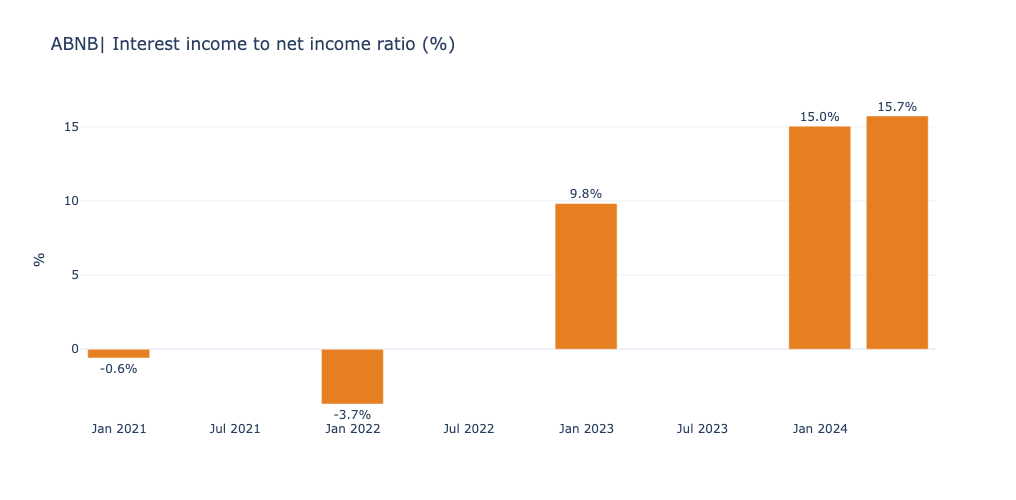

In [196]:
fig = make_subplots(rows=1, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=(
                        # "Interest Income, Total Revenue, and Net Income",
                                    # "Interest Income to Total Revenue Ratio (%)",
                                    # "Interest Income to Net Income Ratio (%)"
                                   )
                   )


fig.add_trace(go.Bar(x=[str(e) for e in dates], 
                     y=interest_income_per_net_income, 
                     name='Interest Income to Net Income Ratio (%)',
                          textposition='outside', 
                     text=[f"{np.round(val, 1)}%" for val in interest_income_per_net_income],  
                     marker_color='#e67e22'), row=1, col=1)
fig.update_yaxes(title_text="%", row=1, col=1)
# Update layout and aesthetics
fig.update_layout(height=500, width=1000, 
                  title_text="ABNB| Interest income to net income ratio (%)", 
                  template="plotly_white")
fig.show()

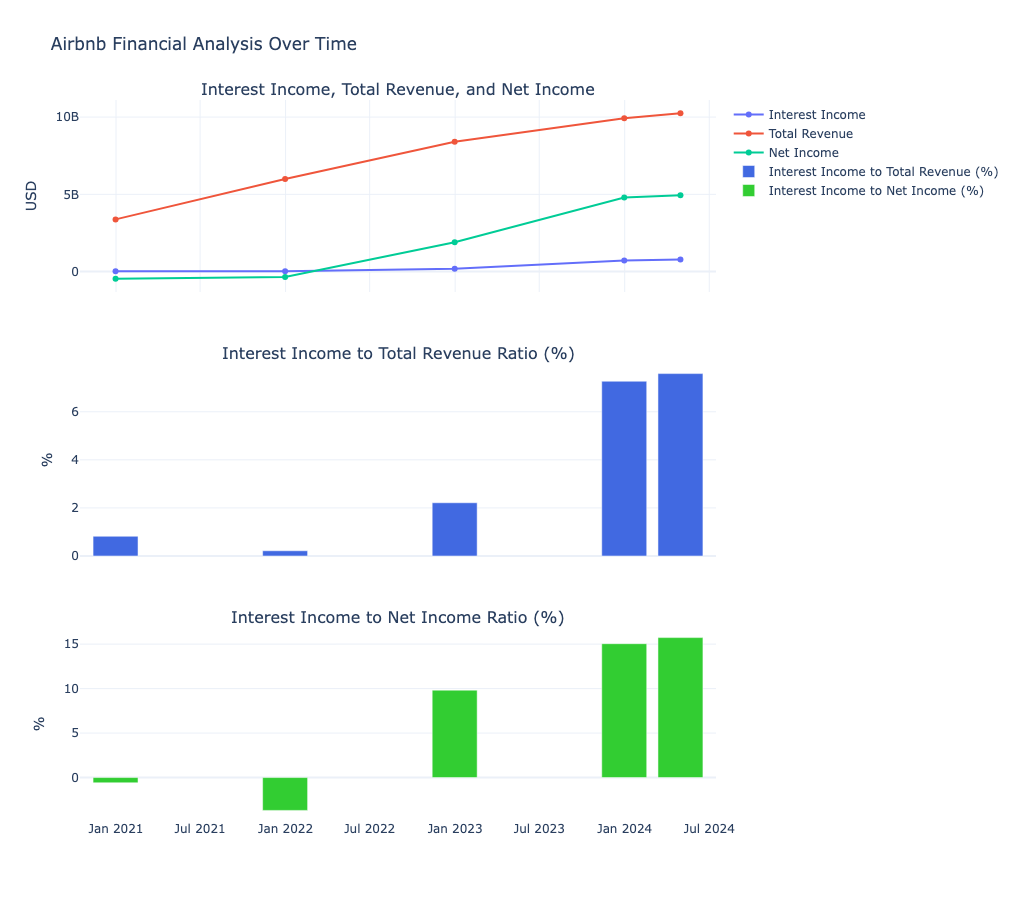

In [174]:


# Create subplots
fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=("Interest Income, Total Revenue, and Net Income",
                                    "Interest Income to Total Revenue Ratio (%)",
                                    "Interest Income to Net Income Ratio (%)"))

# Add traces for raw financial data
fig.add_trace(go.Scatter(x=dates, y=interest_income, mode='lines+markers', name='Interest Income'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=total_revenue, mode='lines+markers', name='Total Revenue'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=net_income, mode='lines+markers', name='Net Income'), row=1, col=1)

# Add traces for financial ratios
fig.add_trace(go.Bar(x=dates, y=int_per_revenue, name='Interest Income to Total Revenue (%)', marker_color='royalblue'), row=2, col=1)
fig.add_trace(go.Bar(x=dates, y=interest_income_per_net_income, name='Interest Income to Net Income (%)', marker_color='limegreen'), row=3, col=1)

# Update y-axes types
fig.update_yaxes(title_text="USD", row=1, col=1)
fig.update_yaxes(title_text="%", row=2, col=1)
fig.update_yaxes(title_text="%", row=3, col=1)

# Update layout and aesthetics
fig.update_layout(height=900, width=1000, title_text="Airbnb Financial Analysis over time", template="plotly_white")
fig.show()


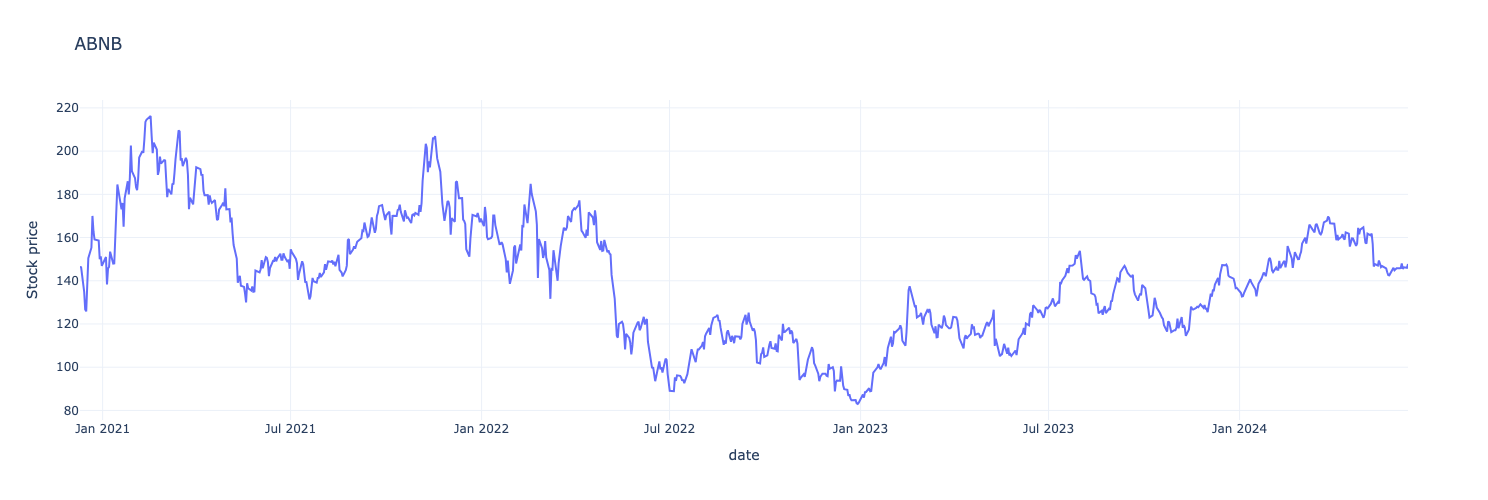

In [11]:
fig = go.Figure(layout=go.Layout(
     
        width=1000,
        height=500,
    ))
fig.add_trace(go.Scatter(x=x_val, y=y_val,
                    mode='lines',
                    name='lines'))



# Edit the layout
fig.update_layout(title='ABNB',
                  template="plotly_white",
                   xaxis_title='date',
                   yaxis_title='Stock price')


fig.show()
